# ASL MODEL

## Load the Dataset in Python

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define image size and batch size
IMG_SIZE = 64  # Resize images to 64x64 pixels
BATCH_SIZE = 32

In [3]:
# Data augmentation & normalization
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  # 80% training, 20% validation
)

#### Check If You Have the Correct Dataset & Verify the Folder Structure 

In [4]:
import os
print(os.listdir("datasets/"))
print(os.listdir("datasets/asl_alphabet_train/asl_alphabet_train/"))

['asl_alphabet_test', 'asl_alphabet_train']
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


### Load Training Data

In [5]:

train_data = datagen.flow_from_directory(
    "datasets/asl_alphabet_train/asl_alphabet_train/",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset="training"
)

Found 69600 images belonging to 29 classes.


### Load Validation Data

In [6]:
val_data = datagen.flow_from_directory(
    "datasets/asl_alphabet_train/asl_alphabet_train/",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset="validation"
)

Found 17400 images belonging to 29 classes.


In [7]:
print(train_data.class_indices) #Verify Dataset Has 29 Classes

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


## Train a CNN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Build the CNN Model

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # Change to 29 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the Model
histroy = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/10
   8/2175 [..............................] - ETA: 38:31 - loss: 3.4618 - accuracy: 0.0352

KeyboardInterrupt: 

In [ ]:
# Save history
import pickle

with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [15]:
# Save the Model
model.save("asl_sign_language_model.h5")

NameError: name 'model' is not defined

### Testing

#### Load the Test Dataset

In [8]:
# Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### load the model

In [9]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("asl_sign_language_model.h5")

print("Model Loaded Successfully!")

Model Loaded Successfully!


In [17]:
# Define test data directory
test_dir = "datasets/asl_alphabet_test/asl_alphabet_test/"

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Get class names from training data
class_labels = sorted(train_data.class_indices.keys())

# Load test images
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Make sure this matches your model input size
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Keep order to match predictions
    # classes=list(train_data.class_indices.keys())  # Forceing same class order
)

# Ensure model predictions follow the correct class order
test_data.class_indices = {label: i for i, label in enumerate(class_labels)}

Found 28 images belonging to 29 classes.


#### Evaluate the Model on Test Data

In [18]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2%}")
print(f"Test Loss: {test_loss:.4f}")

1/1 [==============================] - 0s 134ms/step - loss: 8.5149e-09 - accuracy: 1.0000
Test Accuracy: 100.00%
Test Loss: 0.0000


#### Get Predictions & Confusion Matrix

In [19]:
# Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

1/1 [==============================] - 0s 131ms/step


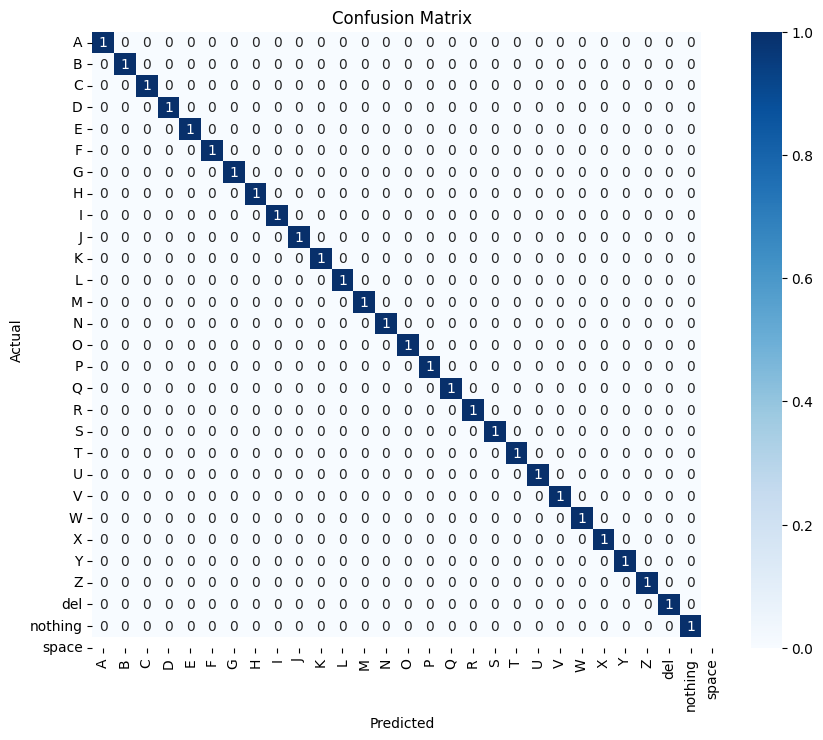

In [20]:

# Get predicted labels
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Classification Report

In [16]:
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      1.00      1.00         1
           H       1.00      1.00      1.00         1
           I       1.00      1.00      1.00         1
           J       0.00      0.00      0.00         1
           K       0.00      0.00      0.00         1
           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           N       0.00      0.00      0.00         1
           O       0.00      0.00      0.00         1
           P       0.00      0.00      0.00         1
           Q       0.00      0.00      0.00         1
           R       0.00    

c:\Users\SUPRIYA DE\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SUPRIYA DE\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SUPRIYA DE\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

####  Accuracy & Loss Curves

NameError: name 'history' is not defined

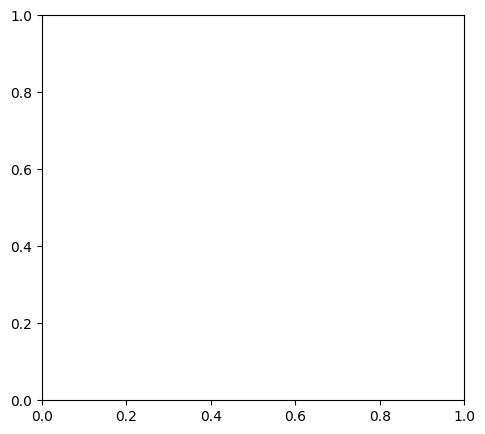

In [ ]:
# Plot training history
import pickle

# Load history
with open("training_history.pkl", "rb") as f:
    history = pickle.load(f)

# Plot accuracy and loss
plt.plot(history["accuracy"], label="Train Accuracy")
plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
